In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Loading the dataset

data=pd.read_csv('Heart_Disease_Prediction.csv')

#Verifying the output by printing first 5 rows of the dataset

data.head(6)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence


In [4]:
data.shape

(270, 14)

In [5]:
data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [144]:
data.isnull()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Heart Diease Predicted,Heart Disease Predicted
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [145]:
from sklearn.preprocessing import OneHotEncoder



enc=OneHotEncoder()

enc_data=pd.DataFrame(enc.fit_transform(data[['Heart Disease Predicted']]).toarray())
new_data=data.join(enc_data)
new_data.drop('Heart Disease', inplace=True, axis=1)

new_data.drop('Heart Diease Predicted', inplace=True, axis=1)







In [138]:
new_data.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease Predicted,0,1
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1,0.0,1.0
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0,1.0,0.0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1,0.0,1.0
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0,1.0,0.0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0,1.0,0.0


In [146]:
new_data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease Predicted       int8
0                          float64
1                          float64
dtype: object

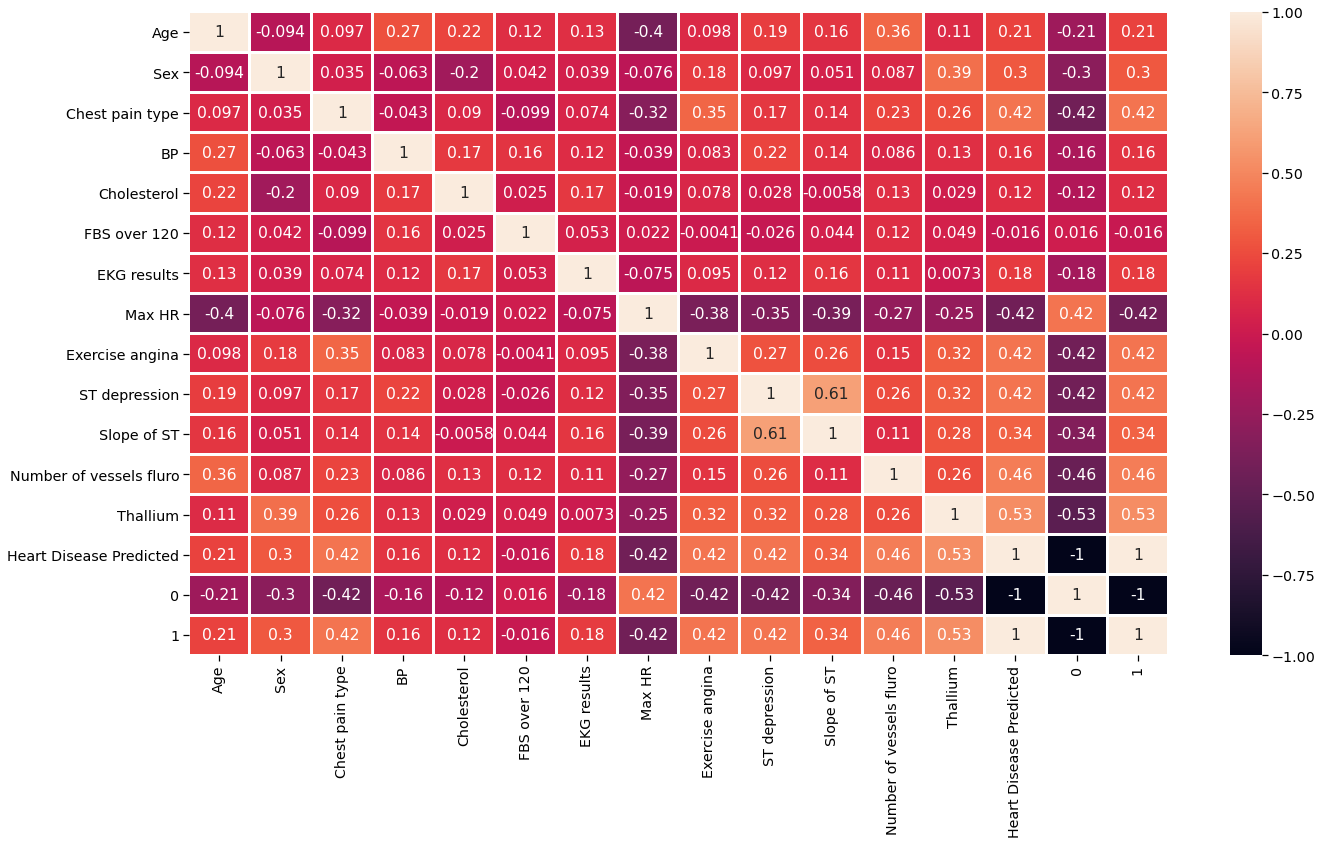

In [147]:
import seaborn as sns

plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(new_data.corr(),annot=True,linewidth =2)
plt.tight_layout()

In [163]:
print(new_data['Age'])

0      70
1      67
2      57
3      64
4      74
       ..
265    52
266    44
267    56
268    57
269    67
Name: Age, Length: 270, dtype: int64


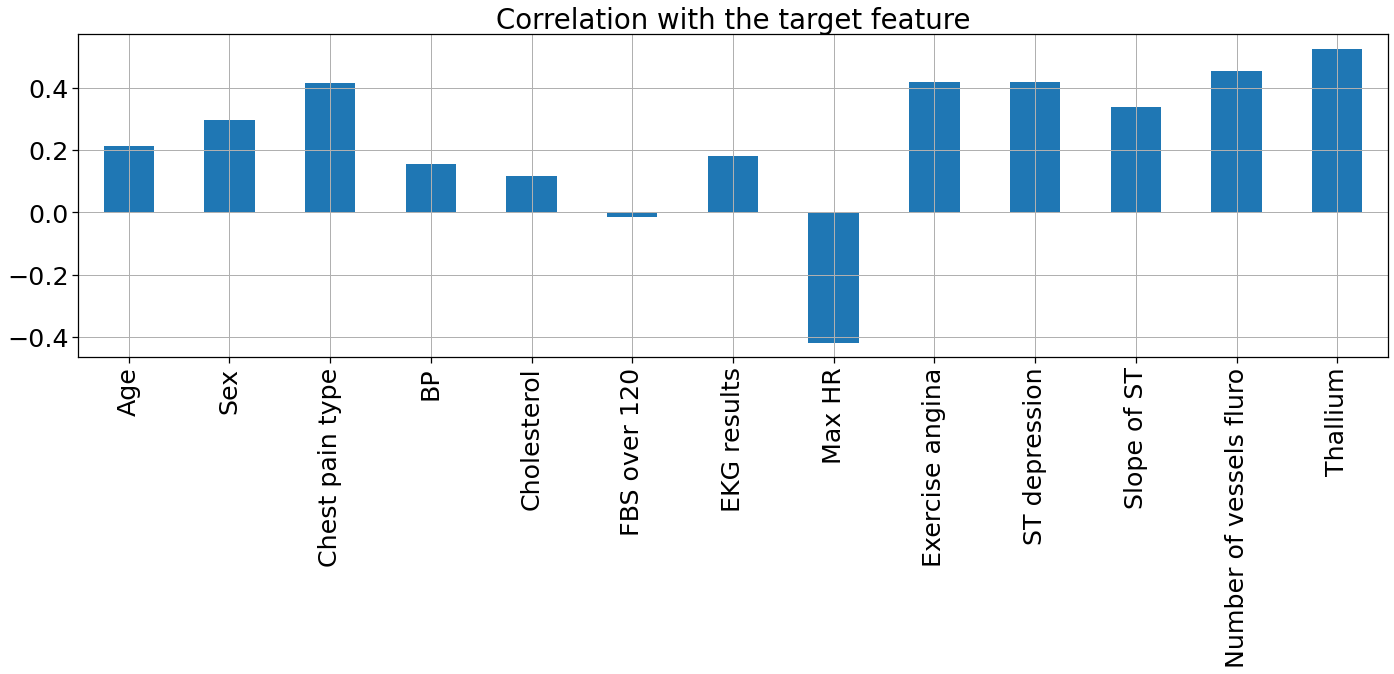

In [155]:
sns.set_context('notebook',font_scale = 2.3)
data.drop('Heart Diease Predicted', inplace=True, axis=1)
data.drop('Heart Disease Predicted', axis=1).corrwith(data['Heart Disease Predicted']).plot(kind='bar', grid=True, 
                                                            figsize=(20, 10), title="Correlation with the target feature")
plt.tight_layout()

In [170]:
new_data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease Predicted,0,1
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444,0.555556,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827,0.497827,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000,1.000000,1.000000


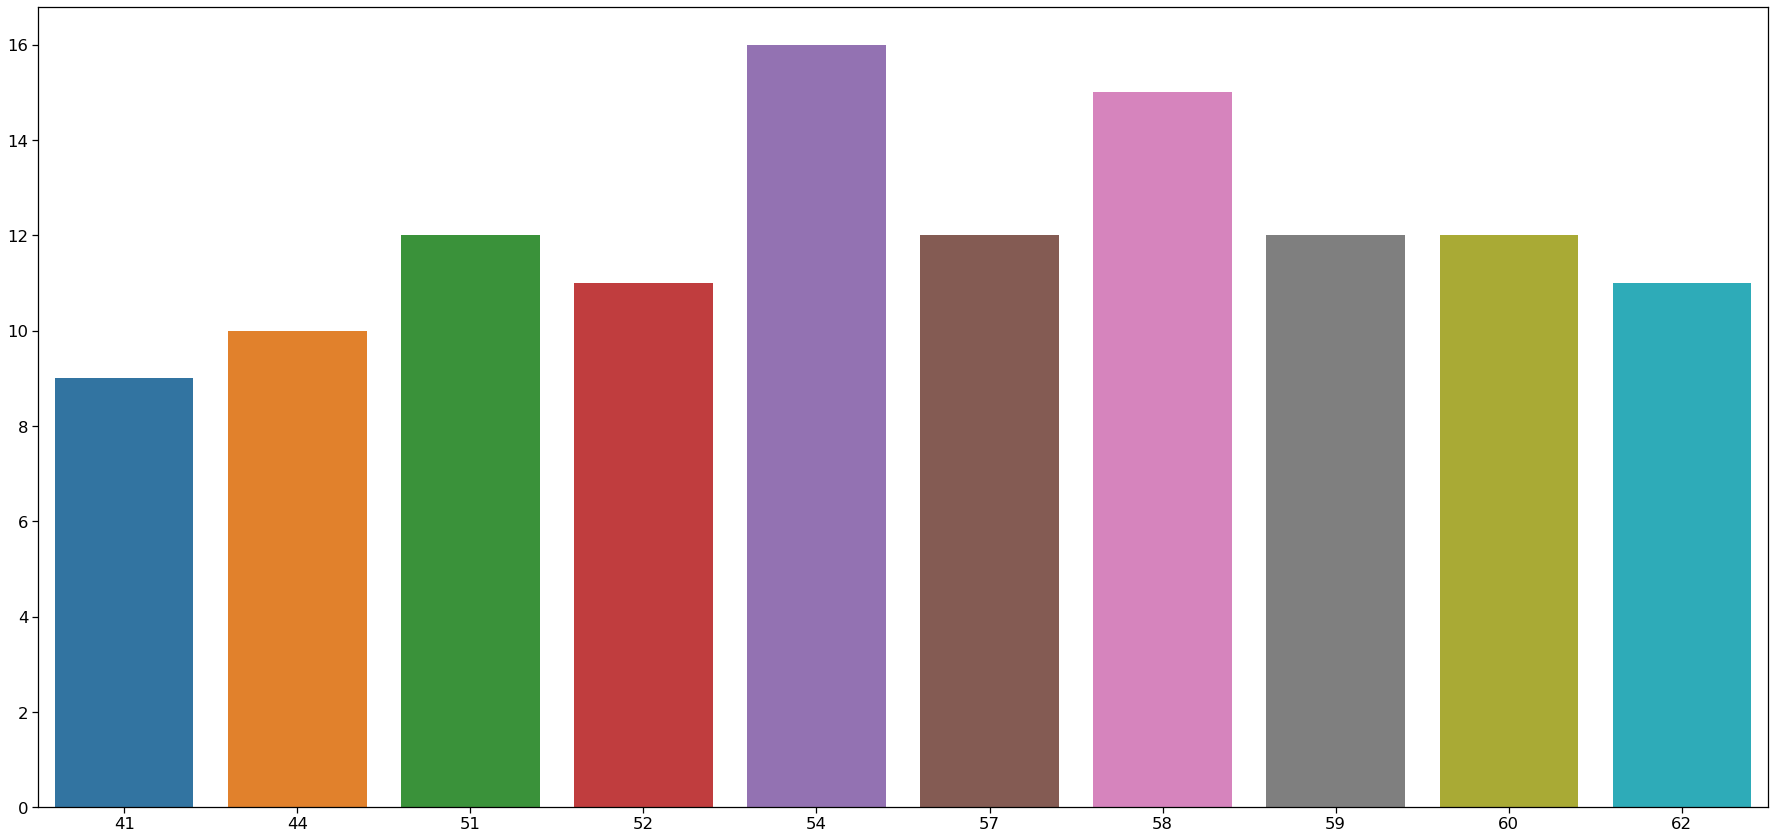

In [171]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=new_data['Age'].value_counts()[:10].index,y=new_data['Age'].value_counts()[:10].values)
plt.tight_layout()

In [172]:
minAge=min(new_data['Age'])
maxAge=max(new_data['Age'])
meanAge=new_data['Age'].mean()
print('Minimum Age :',minAge)
print('Maximum Age :',maxAge)
print('Mean Age :',meanAge)

Minimum Age : 29
Maximum Age : 77
Mean Age : 54.43333333333333


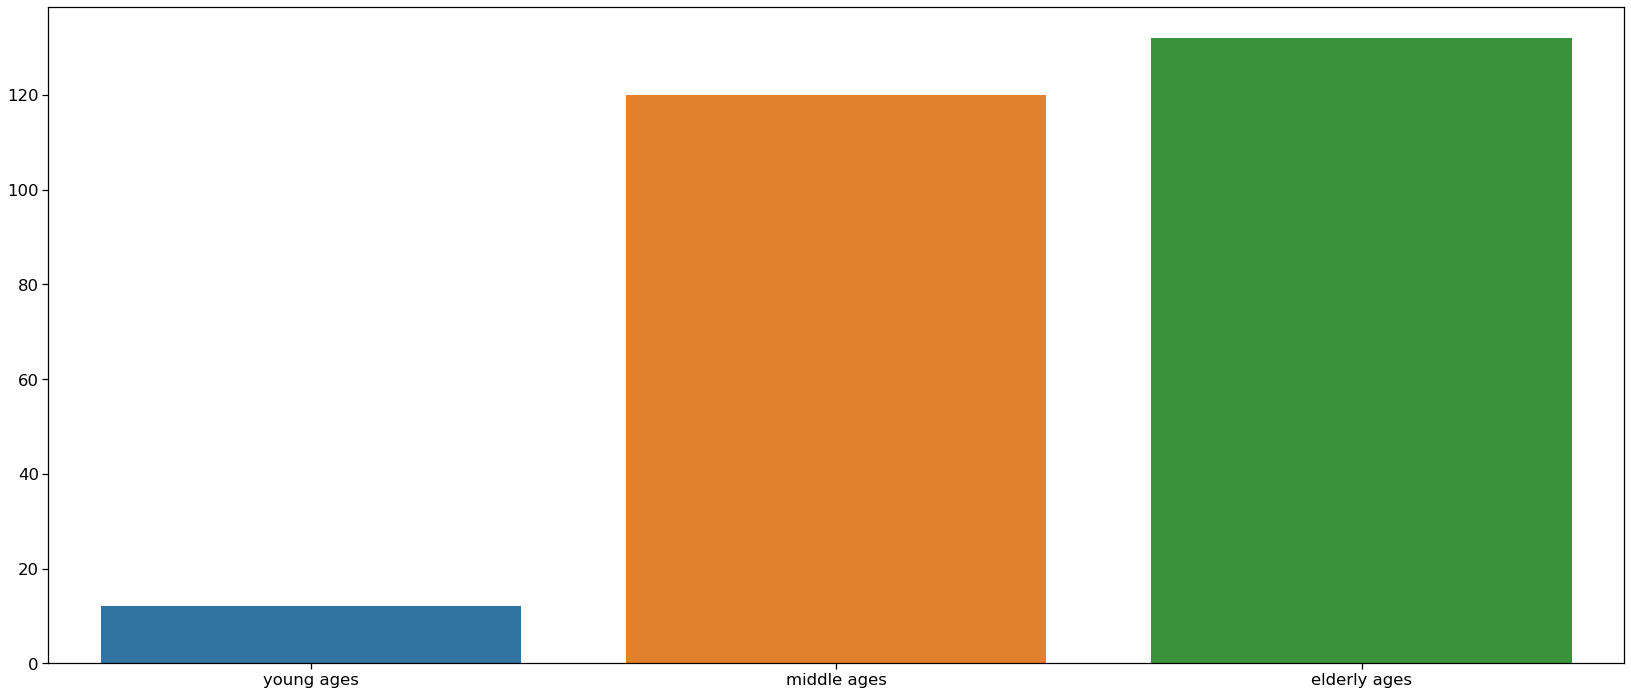

In [173]:
Young = new_data[(new_data['Age']>=29)&(new_data['Age']<40)]
Middle = new_data[(new_data['Age']>=40)&(new_data['Age']<55)]
Elder = new_data[(new_data['Age']>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

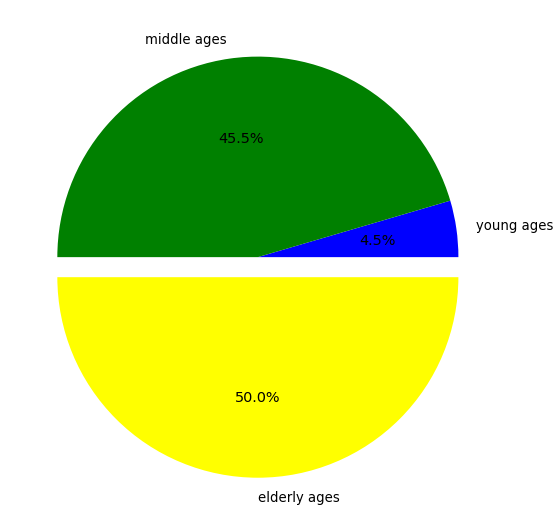

In [177]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


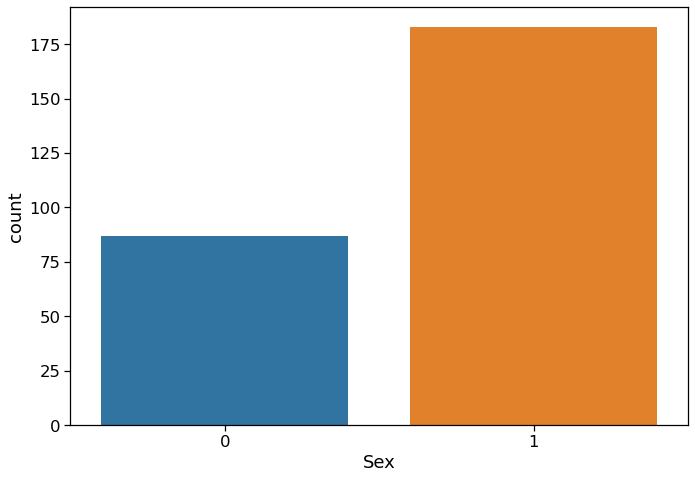

In [182]:
plt.figure(figsize=(10,7))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(new_data['Sex'])
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


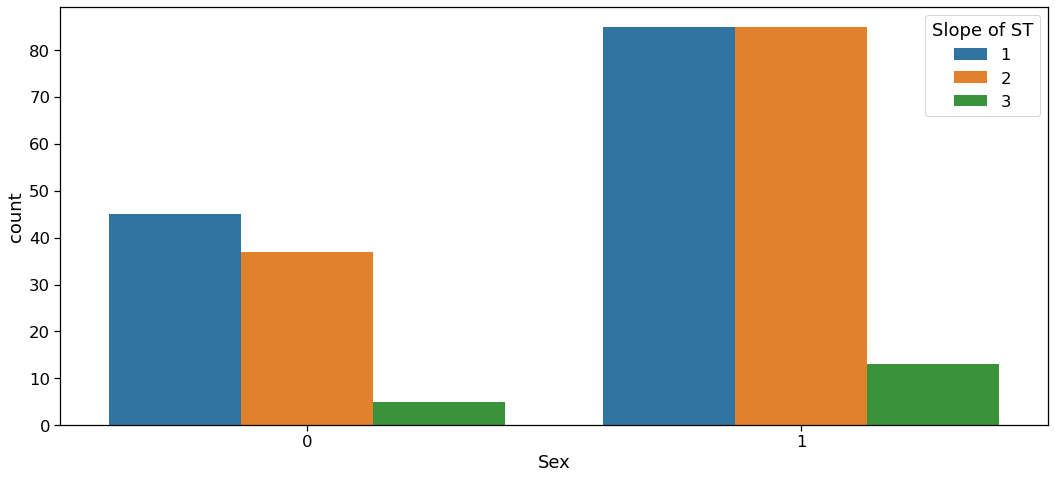

In [197]:
plt.figure(figsize=(15,7))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(new_data['Sex'],hue=data["Slope of ST"])
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


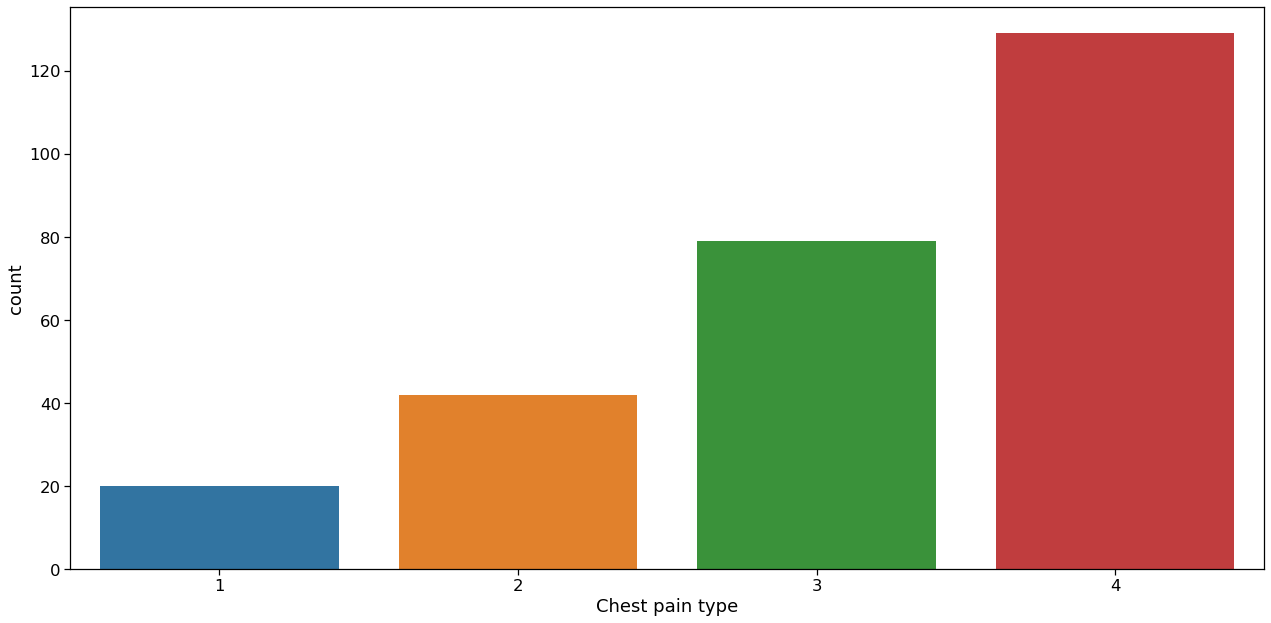

In [194]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(new_data['Chest pain type'])
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


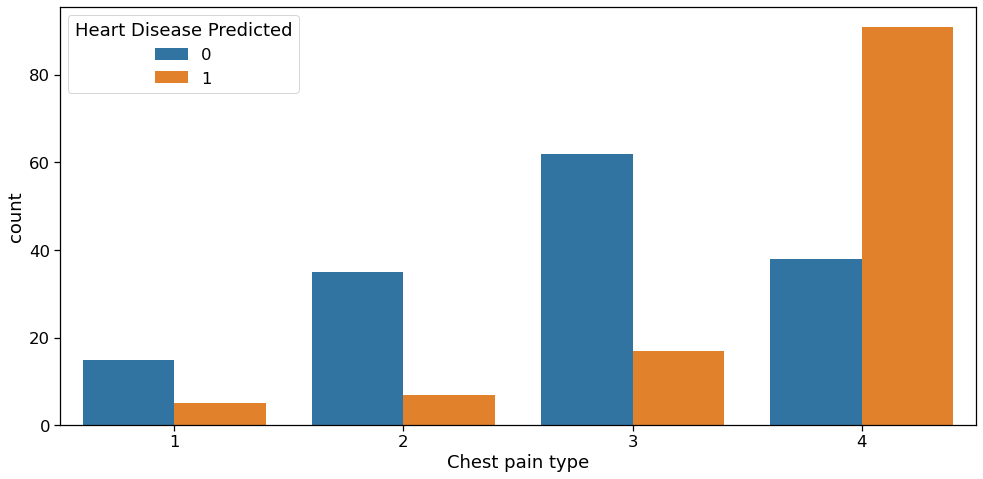

In [193]:
plt.figure(figsize=(14,7))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['Chest pain type'],hue=new_data["Heart Disease Predicted"])
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


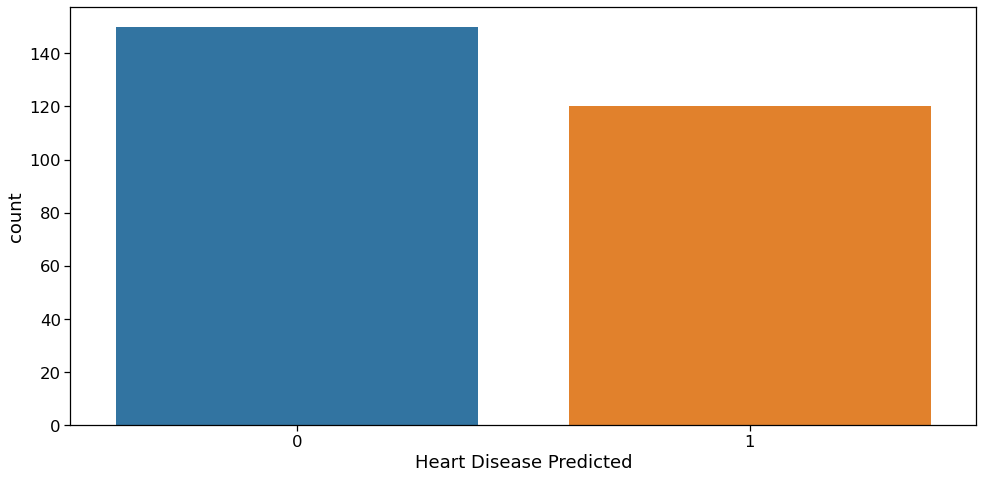

In [200]:
plt.figure(figsize=(14,7))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(new_data['Heart Disease Predicted'])
plt.tight_layout()

In [202]:
new_data.to_csv('Cleaned_Dataset.csv')